## Natural Language Processing with Python - Steve Bird etc

# Chapter 2 Accessing Text Corpora and Lexical Resources

In [1]:
from __future__ import division
import nltk
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [2]:
from nltk.corpus import gutenberg
gutenberg.fileids() # check fileid

[u'austen-emma.txt',
 u'austen-persuasion.txt',
 u'austen-sense.txt',
 u'bible-kjv.txt',
 u'blake-poems.txt',
 u'bryant-stories.txt',
 u'burgess-busterbrown.txt',
 u'carroll-alice.txt',
 u'chesterton-ball.txt',
 u'chesterton-brown.txt',
 u'chesterton-thursday.txt',
 u'edgeworth-parents.txt',
 u'melville-moby_dick.txt',
 u'milton-paradise.txt',
 u'shakespeare-caesar.txt',
 u'shakespeare-hamlet.txt',
 u'shakespeare-macbeth.txt',
 u'whitman-leaves.txt']

In [3]:
emma = gutenberg.words('austen-emma.txt')
len(emma)

192427

In [6]:
emma = nltk.Text(emma)
emma.concordance('surprise')

Displaying 1 of 1 matches:
 that Emma could not but feel some surprise , and a little displeasure , on he


In [7]:
for fileid in gutenberg.fileids():
    num_chars = len(gutenberg.raw(fileid))
    num_words = len(gutenberg.words(fileid))
    num_sents = len(gutenberg.sents(fileid))
    
    num_vocab = len(set([w.lower() for w in gutenberg.words(fileid)]))
    print int(num_chars / num_words), int(num_words / num_sents), int(num_words / num_vocab), fileid

4 24 26 austen-emma.txt
4 26 16 austen-persuasion.txt
4 28 22 austen-sense.txt
4 33 79 bible-kjv.txt
4 19 5 blake-poems.txt
4 19 14 bryant-stories.txt
4 17 12 burgess-busterbrown.txt
4 20 12 carroll-alice.txt
4 20 11 chesterton-ball.txt
4 22 11 chesterton-brown.txt
4 18 10 chesterton-thursday.txt
4 20 24 edgeworth-parents.txt
4 25 15 melville-moby_dick.txt
4 52 10 milton-paradise.txt
4 11 8 shakespeare-caesar.txt
4 12 7 shakespeare-hamlet.txt
4 12 6 shakespeare-macbeth.txt
4 36 12 whitman-leaves.txt


### The above function prints out average word length, average sentence length, average number of times of each vocabulary appears in the text

In [8]:
len(gutenberg.raw('austen-emma.txt'))  # total letters including spaces between words

887071

In [9]:
len(gutenberg.words('austen-emma.txt')) # total words

192427

In [10]:
len(gutenberg.sents('austen-emma.txt')) # sent() function divides the text up into its sentences, where each sentence is a list of words

7752

In [11]:
mytext = nltk.Text("This is my short assay. I like data science so much. Most of my spare time was used for studying \
                   data science. For the past year, I have learned calculus, probability, algebra, machine learning, \
                   python, R, big data, hive, map reduce, and hadoop.")

In [12]:
mytext.concordance('data')

No matches


In [13]:
macbeth = gutenberg.sents('shakespeare-macbeth.txt') 
macbeth[1037] 

[u'Good',
 u'night',
 u',',
 u'and',
 u'better',
 u'health',
 u'Attend',
 u'his',
 u'Maiesty']

In [14]:
from nltk.corpus import webtext
for fileid in webtext.fileids():
    print fileid, webtext.raw(fileid)[:65]

firefox.txt Cookie Manager: "Don't allow sites that set removed cookies to se
grail.txt SCENE 1: [wind] [clop clop clop] 
KING ARTHUR: Whoa there!  [clop
overheard.txt White guy: So, do you have any plans for this evening?
Asian girl
pirates.txt PIRATES OF THE CARRIBEAN: DEAD MAN'S CHEST, by Ted Elliott & Terr
singles.txt 25 SEXY MALE, seeks attrac older single lady, for discreet encoun
wine.txt Lovely delicate, fragrant Rhone wine. Polished leather and strawb


In [15]:
from nltk.corpus import nps_chat
chatroom = nps_chat.posts('10-19-20s_706posts.xml')
chatroom[123]

[u'i',
 u'do',
 u"n't",
 u'want',
 u'hot',
 u'pics',
 u'of',
 u'a',
 u'female',
 u',',
 u'I',
 u'can',
 u'look',
 u'in',
 u'a',
 u'mirror',
 u'.']

In [16]:
from nltk.corpus import brown
brown.categories()

[u'adventure',
 u'belles_lettres',
 u'editorial',
 u'fiction',
 u'government',
 u'hobbies',
 u'humor',
 u'learned',
 u'lore',
 u'mystery',
 u'news',
 u'religion',
 u'reviews',
 u'romance',
 u'science_fiction']

In [17]:
brown.words(categories='news')

[u'The', u'Fulton', u'County', u'Grand', u'Jury', ...]

In [18]:
brown.words(fileids=['cg22'])

[u'Does', u'our', u'society', u'have', u'a', ...]

## linguistic inquiry - stylistics

In [19]:
news_text = brown.words(categories='news')
fdist = nltk.FreqDist([w.lower() for w in news_text])
modals = ['can', 'could', 'may', 'might', 'must', 'will']

for m in modals:
    print m + ":", fdist[m]

can: 94
could: 87
may: 93
might: 38
must: 53
will: 389


In [20]:
wh_words = ['who', 'where', 'why','what', 'when','which']
for w in wh_words:
    print w + ":", fdist[w]

who: 268
where: 59
why: 14
what: 95
when: 169
which: 245


In [21]:
from nltk.corpus import inaugural
inaugural.fileids()[-1]

u'2009-Obama.txt'

In [22]:
from nltk.corpus import reuters
reuters.fileids()

['test/14826',
 'test/14828',
 'test/14829',
 'test/14832',
 'test/14833',
 'test/14839',
 'test/14840',
 'test/14841',
 'test/14842',
 'test/14843',
 'test/14844',
 'test/14849',
 'test/14852',
 'test/14854',
 'test/14858',
 'test/14859',
 'test/14860',
 'test/14861',
 'test/14862',
 'test/14863',
 'test/14865',
 'test/14867',
 'test/14872',
 'test/14873',
 'test/14875',
 'test/14876',
 'test/14877',
 'test/14881',
 'test/14882',
 'test/14885',
 'test/14886',
 'test/14888',
 'test/14890',
 'test/14891',
 'test/14892',
 'test/14899',
 'test/14900',
 'test/14903',
 'test/14904',
 'test/14907',
 'test/14909',
 'test/14911',
 'test/14912',
 'test/14913',
 'test/14918',
 'test/14919',
 'test/14921',
 'test/14922',
 'test/14923',
 'test/14926',
 'test/14928',
 'test/14930',
 'test/14931',
 'test/14932',
 'test/14933',
 'test/14934',
 'test/14941',
 'test/14943',
 'test/14949',
 'test/14951',
 'test/14954',
 'test/14957',
 'test/14958',
 'test/14959',
 'test/14960',
 'test/14962',
 'test/149

In [23]:
reuters.categories()

[u'acq',
 u'alum',
 u'barley',
 u'bop',
 u'carcass',
 u'castor-oil',
 u'cocoa',
 u'coconut',
 u'coconut-oil',
 u'coffee',
 u'copper',
 u'copra-cake',
 u'corn',
 u'cotton',
 u'cotton-oil',
 u'cpi',
 u'cpu',
 u'crude',
 u'dfl',
 u'dlr',
 u'dmk',
 u'earn',
 u'fuel',
 u'gas',
 u'gnp',
 u'gold',
 u'grain',
 u'groundnut',
 u'groundnut-oil',
 u'heat',
 u'hog',
 u'housing',
 u'income',
 u'instal-debt',
 u'interest',
 u'ipi',
 u'iron-steel',
 u'jet',
 u'jobs',
 u'l-cattle',
 u'lead',
 u'lei',
 u'lin-oil',
 u'livestock',
 u'lumber',
 u'meal-feed',
 u'money-fx',
 u'money-supply',
 u'naphtha',
 u'nat-gas',
 u'nickel',
 u'nkr',
 u'nzdlr',
 u'oat',
 u'oilseed',
 u'orange',
 u'palladium',
 u'palm-oil',
 u'palmkernel',
 u'pet-chem',
 u'platinum',
 u'potato',
 u'propane',
 u'rand',
 u'rape-oil',
 u'rapeseed',
 u'reserves',
 u'retail',
 u'rice',
 u'rubber',
 u'rye',
 u'ship',
 u'silver',
 u'sorghum',
 u'soy-meal',
 u'soy-oil',
 u'soybean',
 u'strategic-metal',
 u'sugar',
 u'sun-meal',
 u'sun-oil',
 u'su

In [24]:
reuters.categories('training/9865')

[u'barley', u'corn', u'grain', u'wheat']

In [25]:
reuters.categories(['training/9865', 'training/9880'])

[u'barley', u'corn', u'grain', u'money-fx', u'wheat']

## Loading Your Own Corpus - PlaintextCorpusReader

Two parameters:
- corpus_root
- initializer

In [26]:
from nltk.corpus import PlaintextCorpusReader

corpus_root = r'C:\Users\dbsnail\mlndCapstone\textfiles'
print(corpus_root)
wordlists = PlaintextCorpusReader(corpus_root, '[abc]\.*\.txt')
wordlists.fileids()

C:\Users\dbsnail\mlndCapstone\textfiles


['a.txt', 'b.txt', 'c.txt']

In [27]:
len(wordlists.sents())

95

In [28]:
wordlists.sents(fileids='b.txt')

[[u'I', u'am', u'happy', u'to', u'join', u'with', u'you', u'today', u'in', u'what', u'will', u'go', u'down', u'in', u'history', u'as', u'the', u'greatest', u'demonstration', u'for', u'freedom', u'in', u'the', u'history', u'of', u'our', u'nation', u'.'], [u'Five', u'score', u'years', u'ago', u',', u'a', u'great', u'American', u',', u'in', u'whose', u'symbolic', u'shadow', u'we', u'stand', u'today', u',', u'signed', u'the', u'Emancipation', u'Proclamation', u'.'], ...]

In [31]:
c_word_list = wordlists.words('c.txt')
c_word_list

[u'The', u'negative', u'health', u'effects', u'of', ...]

## Conditional Frequency Distributions

- FreqDist(): takes a simple list as input
- ConditionalFreqDist(): takes a list of pairs

In [32]:
cfd = nltk.ConditionalFreqDist(
          (genre, word)
          for genre in brown.categories()
          for word in brown.words(categories=genre))
genres = ['news', 'religion', 'hobies', 'science_fiction', 'romance', 'humor']
modals = ['can', 'could', 'may', 'might', 'must', 'will']

cfd.tabulate(conditions=genres, samples=modals)

                  can could   may might  must  will 
           news    93    86    66    38    50   389 
       religion    82    59    78    12    54    71 
         hobies     0     0     0     0     0     0 
science_fiction    16    49     4    12     8    16 
        romance    74   193    11    51    45    43 
          humor    16    30     8     8     9    13 


In [33]:
# break down two genres, news and romance

genre_word = [(genre, word)
             for genre in ['news','romance']
             for word in brown.words(categories=genre)]
len(genre_word)

170576

In [34]:
genre_word[:10]

[('news', u'The'),
 ('news', u'Fulton'),
 ('news', u'County'),
 ('news', u'Grand'),
 ('news', u'Jury'),
 ('news', u'said'),
 ('news', u'Friday'),
 ('news', u'an'),
 ('news', u'investigation'),
 ('news', u'of')]

In [35]:
genre_word[-10:]

[('romance', u'Washington'),
 ('romance', u'episode'),
 ('romance', u"''"),
 ('romance', u'.'),
 ('romance', u'``'),
 ('romance', u"I'm"),
 ('romance', u'afraid'),
 ('romance', u'not'),
 ('romance', u"''"),
 ('romance', u'.')]

In [37]:
# use the list of pairs to create a ConditionalFreqDist and save it in a variable cfd

cfd = nltk.ConditionalFreqDist(genre_word)

cfd.tabulate(conditions=['news','romance'], samples=modals)

          can could   may might  must  will 
   news    93    86    66    38    50   389 
romance    74   193    11    51    45    43 


In [38]:
cfd.conditions()

['romance', 'news']

In [39]:
cfd['news']

FreqDist({u'sunbonnet': 1,
          u'Elevated': 1,
          u'narcotic': 2,
          u'four': 73,
          u'woods': 4,
          u'railing': 1,
          u'Until': 5,
          u'aggression': 1,
          u'marching': 2,
          u'increase': 24,
          u'eligible': 4,
          u'electricity': 1,
          u'$25-a-plate': 1,
          u'wheeled': 2,
          u'Casey': 6,
          u'all-county': 1,
          u'Belgians': 20,
          u'Western': 7,
          u'dependency': 2,
          u'1959-60': 1,
          u'Duhagon': 1,
          u'sinking': 1,
          u'1,119': 1,
          u'co-operation': 1,
          u'Famed': 1,
          u'regional': 2,
          u'Charitable': 1,
          u'appropriation': 2,
          u'yellow': 3,
          u'Old': 11,
          u'Heights': 1,
          u'bringing': 2,
          u'Policies': 2,
          u'prize': 5,
          u'Loen': 1,
          u'Publique': 2,
          u'wooden': 1,
          u'Loeb': 1,
          u'specialties': 1,
 

In [47]:
list(cfd['romance'])

[u'raining',
 u'belligerence',
 u'yellow',
 u'factory',
 u'four',
 u'Does',
 u'railing',
 u'ringlets',
 u'self-pity',
 u'attracted',
 u'snowing',
 u'wheeled',
 u'Ronald',
 u'Western',
 u'lore',
 u'portentous',
 u'immature',
 u'shaving',
 u'Elec',
 u'foul',
 u'uncertain',
 u'bringing',
 u'hostess',
 u'wooden',
 u'piling',
 u'persisted',
 u'woods',
 u'succession',
 u'Tuesday',
 u'Paul',
 u'Jerez',
 u'reliable',
 u'bill',
 u'tired',
 u'hanging',
 u'pulse',
 u'elegant',
 u'second',
 u'valiant',
 u'sailed',
 u'scraped',
 u'loathing',
 u'nigs',
 u"gran'dad",
 u"this'll",
 u'Initially',
 u'thunder',
 u'contributed',
 u'fingers',
 u'Wrong',
 u'Hamilton',
 u'cars',
 u'College',
 u'hero',
 u'chins',
 u'jubilantly',
 u'interdependent',
 u'here',
 u'reported',
 u'chassis',
 u'china',
 u'hers',
 u'shriek',
 u'Yuki',
 u'kids',
 u'unwillingness',
 u'elaborate',
 u'climbed',
 u'encouragement',
 u'golden',
 u'explained',
 u'Three',
 u'brought',
 u'remnant',
 u'stern',
 u'Wales',
 u'Pompeii',
 u'spoke',

## Ploting and Tabulating Distributions

In [49]:
cfd = nltk.ConditionalFreqDist(
          (target, fileid[:4])
          for fileid in inaugural.fileids()
          for w in inaugural.words(fileid)
          for target in ['american', 'citizen']
          if w.lower().startswith(target))

In [52]:
from nltk.corpus import udhr
languages = ['English', 'German_Deutsch', 'Chickasaw','Greenlandic_Inuktikut', 'Hungarian_Magyar', 'Ibibio_Efik']
cfd = nltk.ConditionalFreqDist(
           (lang, len(word))
           for lang in languages
           for word in udhr.words(lang + '-Latin1'))

In [56]:
cfd.tabulate(conditions = ['English','German_Deutsch', 'Chickasaw'], samples = range(21), cumulative=True)

                  0    1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16   17   18   19   20 
       English    0  185  525  883  997 1166 1283 1440 1558 1638 1701 1751 1763 1774 1780 1781 1781 1781 1781 1781 1781 
German_Deutsch    0  171  263  614  717  894 1013 1110 1213 1275 1333 1386 1418 1445 1474 1489 1503 1506 1513 1518 1520 
     Chickasaw    0  411  510  551  619  710  799  876  946  995 1028 1044 1072 1117 1127 1133 1137 1142 1145 1147 1148 


In [76]:
days = ['mondays', 'tuesday','wednesday', 'thursday', 'friday', 'saturday','sunday']
cfd = nltk.ConditionalFreqDist(
      (genre, word)
      for genre in ['news', 'romance']
      for word in brown.words(categories=genre)
      if word.lower() in days)

In [77]:
cfd.tabulate(conditions=['news', 'romance'], samples=['Mondays', 'Tuesday','Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday'])

          Mondays   Tuesday Wednesday  Thursday    Friday  Saturday    Sunday 
   news         0        43        22        20        41        33        51 
romance         0         3         3         1         3         4         5 


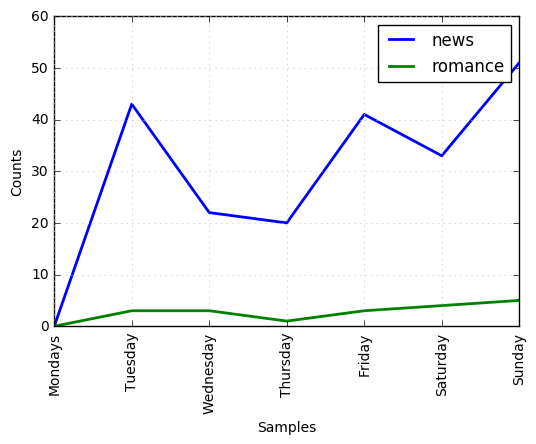

In [78]:
cfd.plot(conditions=['news', 'romance'], samples=['Mondays', 'Tuesday','Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday'])

## Generating Random Text with Bigrams

In [41]:
sent = ['In', 'the', 'beginning', 'God', 'created', 'the', 'heaven', 'and', 'the', 'earth', '.'] 
nltk.bigrams(sent)

<generator object bigrams at 0x000000000B23E090>

In [52]:
"""obtains all bigrams from the text of the book of Genesis, then constructs a conditional frequency distribution 
to record which words are most likely to follow a given word. e.g., after the word living, the most likely word is 
creature; the generate_model() function uses this data, and a seed word, to generate random text. """
text = nltk.corpus.genesis.words('english-kjv.txt')
bigrams = nltk.bigrams(text)
cfd = nltk.ConditionalFreqDist(bigrams) 

print cfd

<ConditionalFreqDist with 2789 conditions>


In [53]:
def generate_model(cfdist, word, num=15):    
    for i in range(num):        
        print word,        
        word = cfdist[word].max()
generate_model(cfd, 'I')

I will not be a son , and the land of the land of the


## A Pronoucing Dictionary

In [86]:
entries = nltk.corpus.cmudict.entries()
len(entries)

133737

In [92]:
for word, pron in entries[13080:13090]:
    print word, pron
    
# Each entry consists of two parts, word and phone. Phone is a list of phonetic codes. The phones contain 
# digits to represent primary stress (1), secondary stress (2), and no stress (0)

bolyard [u'B', u'AH0', u'L', u'Y', u'AA1', u'R', u'D']
bolz [u'B', u'OW1', u'L', u'Z']
bom [u'B', u'AA1', u'M']
bomag [u'B', u'OW1', u'M', u'AE0', u'G']
boman [u'B', u'OW1', u'M', u'AH0', u'N']
bomar [u'B', u'AH0', u'M', u'AA1', u'R']
bomb [u'B', u'AA1', u'M']
bomb [u'B', u'AO1', u'M']
bomba [u'B', u'AA1', u'M', u'B', u'AH0']
bombard [u'B', u'AA0', u'M', u'B', u'AA1', u'R', u'D']


In [95]:
# look up the dictionary
dicts = nltk.corpus.cmudict.dict()
dicts['bomb']

[[u'B', u'AA1', u'M'], [u'B', u'AO1', u'M']]

In [97]:
# text-to-speech function looks up each word of the text in the pronunciation dictionary

text = ['natural', 'language', 'processing']
[phone for w in text for phone in dicts[w][0]]

[u'N',
 u'AE1',
 u'CH',
 u'ER0',
 u'AH0',
 u'L',
 u'L',
 u'AE1',
 u'NG',
 u'G',
 u'W',
 u'AH0',
 u'JH',
 u'P',
 u'R',
 u'AA1',
 u'S',
 u'EH0',
 u'S',
 u'IH0',
 u'NG']